<a href="https://colab.research.google.com/github/KovryakRuslan312005/MH-Kovryak-Ruslan-3-16/blob/main/%20%D0%9A%D0%BE%D0%B2%D1%80%D1%8F%D0%BA%20%D0%A0%D1%83%D1%81%D0%BB%D0%B0%D0%BD%20%D0%9B%D0%B0%D0%B1%D0%B0%20%E2%84%9612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ковряк Руслан Павлович лаба №12

Крок №1.Завантажуємо необхідні бібліотеки

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report


Крок №2.Підготовляємо данні для роботи

In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=False)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


Крок №3.Підготовляємо vgg16

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Крок №4.Будуємо модель

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Заморожуємо шари

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Крок №5.Навчаємо модель

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_data=val_generator,
    validation_steps=50
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 779s 8s/step - accuracy: 0.7803 - loss: 0.5249 - val_accuracy: 0.8620 - val_loss: 0.3456
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 793s 8s/step - accuracy: 0.9294 - loss: 0.1787 - val_accuracy: 0.8710 - val_loss: 0.3017


Крок №6.Робимо криві навчання

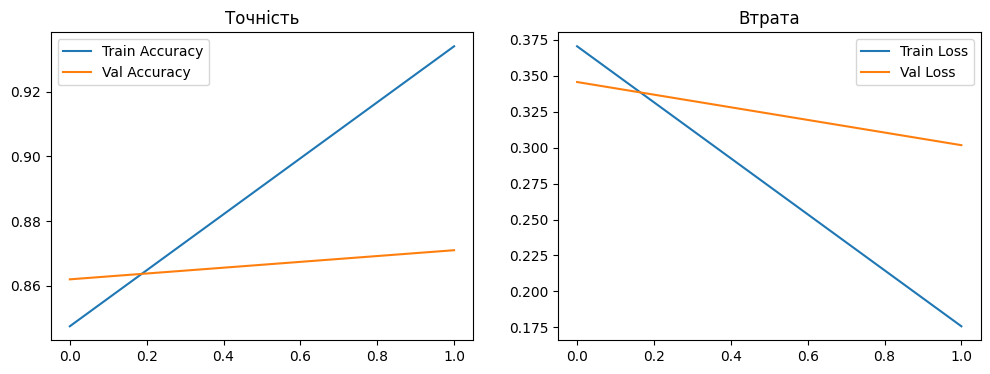

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Втрата')
plt.legend()

plt.show()


Крок №7.Результат

In [ ]:
val_generator.reset()
pred = model.predict(val_generator, steps=val_generator.samples // 20 + 1)
pred_labels = (pred > 0.5).astype(int).reshape(-1)

true_labels = val_generator.classes
class_names = list(val_generator.class_indices.keys())

print(classification_report(true_labels, pred_labels, target_names=class_names))


51/51 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step
              precision    recall  f1-score   support

        cats       0.50      0.58      0.54       500
        dogs       0.51      0.43      0.47       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.51      0.51      0.50      1000



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


Висновок:В цій лабі ми працювали знову з датасетом котів та собак,будували модель класифікацій з претренованої моделі vgg16,виводили криві навчання та отримали результати.
